In [1]:
import torch

In [2]:
from torch import nn

In [4]:
from torch import optim

In [129]:
import torch.nn.functional as F

In [7]:
import random
import numpy as np

In [60]:
x = random.choices(list(range(40)), k=100)

In [61]:
y = [1.8*x + 32 for x in x]

In [63]:
x[:5],y[:5]

([13, 4, 30, 12, 3], [55.400000000000006, 39.2, 86.0, 53.6, 37.4])

In [64]:
train_x = torch.Tensor(x)

In [65]:
train_x

tensor([13.,  4., 30., 12.,  3., 34., 18., 12., 14., 37.,  7., 15., 30., 20.,
         5., 23.,  8.,  0., 11., 30., 24., 17., 35., 12., 31., 33.,  9., 24.,
        21.,  7., 23.,  8., 13., 39.,  7., 37., 14., 30., 21., 16.,  9.,  3.,
        10., 21., 16., 24.,  7.,  3., 16., 27., 14., 10.,  4., 39., 24., 11.,
         2.,  6., 27.,  5.,  9., 13., 29., 37., 17., 12.,  3., 31., 28., 33.,
        14.,  3.,  6., 22., 20., 26.,  8., 12., 16., 37.,  5.,  7., 36., 27.,
        22.,  6., 21., 27., 32., 25.,  8., 13., 25.,  0., 17., 18., 11.,  3.,
         4., 13.])

In [66]:
train_x.view(-1,1)

tensor([[13.],
        [ 4.],
        [30.],
        [12.],
        [ 3.],
        [34.],
        [18.],
        [12.],
        [14.],
        [37.],
        [ 7.],
        [15.],
        [30.],
        [20.],
        [ 5.],
        [23.],
        [ 8.],
        [ 0.],
        [11.],
        [30.],
        [24.],
        [17.],
        [35.],
        [12.],
        [31.],
        [33.],
        [ 9.],
        [24.],
        [21.],
        [ 7.],
        [23.],
        [ 8.],
        [13.],
        [39.],
        [ 7.],
        [37.],
        [14.],
        [30.],
        [21.],
        [16.],
        [ 9.],
        [ 3.],
        [10.],
        [21.],
        [16.],
        [24.],
        [ 7.],
        [ 3.],
        [16.],
        [27.],
        [14.],
        [10.],
        [ 4.],
        [39.],
        [24.],
        [11.],
        [ 2.],
        [ 6.],
        [27.],
        [ 5.],
        [ 9.],
        [13.],
        [29.],
        [37.],
        [17.],
        [12.],
        [ 

In [67]:
train_x = train_x.view(-1,1)

In [68]:
train_y = torch.Tensor(y)

In [69]:
train_y = train_y.view(-1,1)

In [79]:
class BasicNet(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super().__init__()
        
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        
        return out

In [102]:
model = BasicNet(1, 1)

In [103]:
criterion = nn.MSELoss()

In [104]:
optimizer = optim.SGD(model.parameters(), lr=0.002)

In [105]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.002
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [106]:
step = 0
for e in range(3000):
    step += 1
    
    optimizer.zero_grad()
    
    outs = model.forward(train_x)
    loss = criterion(outs, train_y)
    
#     print(outs)
    
    loss.backward() #back prop
    optimizer.step()
    
    print(f"Epoch {e} with a loss of {loss}")

Epoch 0 with a loss of 4904.35595703125
Epoch 1 with a loss of 2181.394287109375
Epoch 2 with a loss of 1057.15869140625
Epoch 3 with a loss of 592.7888793945312
Epoch 4 with a loss of 400.7760314941406
Epoch 5 with a loss of 321.1781921386719
Epoch 6 with a loss of 287.979736328125
Epoch 7 with a loss of 273.9331359863281
Epoch 8 with a loss of 267.7920837402344
Epoch 9 with a loss of 264.914794921875
Epoch 10 with a loss of 263.3854064941406
Epoch 11 with a loss of 262.4130859375
Epoch 12 with a loss of 261.67144775390625
Epoch 13 with a loss of 261.0257568359375
Epoch 14 with a loss of 260.42047119140625
Epoch 15 with a loss of 259.83258056640625
Epoch 16 with a loss of 259.2526550292969
Epoch 17 with a loss of 258.6767272949219
Epoch 18 with a loss of 258.1031799316406
Epoch 19 with a loss of 257.5313720703125
Epoch 20 with a loss of 256.96099853515625
Epoch 21 with a loss of 256.3919982910156
Epoch 22 with a loss of 255.8243408203125
Epoch 23 with a loss of 255.2578887939453
Epoch

Epoch 572 with a loss of 75.59416961669922
Epoch 573 with a loss of 75.42680358886719
Epoch 574 with a loss of 75.25979614257812
Epoch 575 with a loss of 75.09314727783203
Epoch 576 with a loss of 74.9269027709961
Epoch 577 with a loss of 74.76100158691406
Epoch 578 with a loss of 74.59547424316406
Epoch 579 with a loss of 74.4303207397461
Epoch 580 with a loss of 74.26551818847656
Epoch 581 with a loss of 74.1010971069336
Epoch 582 with a loss of 73.9370346069336
Epoch 583 with a loss of 73.77332305908203
Epoch 584 with a loss of 73.60997009277344
Epoch 585 with a loss of 73.4469985961914
Epoch 586 with a loss of 73.28437042236328
Epoch 587 with a loss of 73.12213134765625
Epoch 588 with a loss of 72.96023559570312
Epoch 589 with a loss of 72.79866790771484
Epoch 590 with a loss of 72.63749694824219
Epoch 591 with a loss of 72.47667694091797
Epoch 592 with a loss of 72.3161849975586
Epoch 593 with a loss of 72.15606689453125
Epoch 594 with a loss of 71.99630737304688
Epoch 595 with a 

Epoch 1101 with a loss of 23.40182876586914
Epoch 1102 with a loss of 23.35001564025879
Epoch 1103 with a loss of 23.298315048217773
Epoch 1104 with a loss of 23.24672508239746
Epoch 1105 with a loss of 23.195261001586914
Epoch 1106 with a loss of 23.143901824951172
Epoch 1107 with a loss of 23.092670440673828
Epoch 1108 with a loss of 23.041532516479492
Epoch 1109 with a loss of 22.990516662597656
Epoch 1110 with a loss of 22.939607620239258
Epoch 1111 with a loss of 22.888824462890625
Epoch 1112 with a loss of 22.838138580322266
Epoch 1113 with a loss of 22.787574768066406
Epoch 1114 with a loss of 22.73712730407715
Epoch 1115 with a loss of 22.686782836914062
Epoch 1116 with a loss of 22.636552810668945
Epoch 1117 with a loss of 22.58642578125
Epoch 1118 with a loss of 22.536422729492188
Epoch 1119 with a loss of 22.486528396606445
Epoch 1120 with a loss of 22.436738967895508
Epoch 1121 with a loss of 22.387060165405273
Epoch 1122 with a loss of 22.33749008178711
Epoch 1123 with a l

Epoch 1601 with a loss of 7.725558757781982
Epoch 1602 with a loss of 7.708446502685547
Epoch 1603 with a loss of 7.691383361816406
Epoch 1604 with a loss of 7.674355506896973
Epoch 1605 with a loss of 7.657360076904297
Epoch 1606 with a loss of 7.640402317047119
Epoch 1607 with a loss of 7.623484134674072
Epoch 1608 with a loss of 7.606606960296631
Epoch 1609 with a loss of 7.5897722244262695
Epoch 1610 with a loss of 7.572964668273926
Epoch 1611 with a loss of 7.55619478225708
Epoch 1612 with a loss of 7.5394673347473145
Epoch 1613 with a loss of 7.522768020629883
Epoch 1614 with a loss of 7.5061140060424805
Epoch 1615 with a loss of 7.48948860168457
Epoch 1616 with a loss of 7.472907066345215
Epoch 1617 with a loss of 7.456364154815674
Epoch 1618 with a loss of 7.43984842300415
Epoch 1619 with a loss of 7.42338228225708
Epoch 1620 with a loss of 7.406947135925293
Epoch 1621 with a loss of 7.390545845031738
Epoch 1622 with a loss of 7.374183177947998
Epoch 1623 with a loss of 7.35785

Epoch 2111 with a loss of 2.494489908218384
Epoch 2112 with a loss of 2.4889676570892334
Epoch 2113 with a loss of 2.483455181121826
Epoch 2114 with a loss of 2.4779558181762695
Epoch 2115 with a loss of 2.4724671840667725
Epoch 2116 with a loss of 2.4669930934906006
Epoch 2117 with a loss of 2.461531400680542
Epoch 2118 with a loss of 2.4560790061950684
Epoch 2119 with a loss of 2.450641632080078
Epoch 2120 with a loss of 2.4452152252197266
Epoch 2121 with a loss of 2.4398019313812256
Epoch 2122 with a loss of 2.434400796890259
Epoch 2123 with a loss of 2.429011344909668
Epoch 2124 with a loss of 2.4236345291137695
Epoch 2125 with a loss of 2.4182674884796143
Epoch 2126 with a loss of 2.4129133224487305
Epoch 2127 with a loss of 2.407569646835327
Epoch 2128 with a loss of 2.4022371768951416
Epoch 2129 with a loss of 2.396919012069702
Epoch 2130 with a loss of 2.3916127681732178
Epoch 2131 with a loss of 2.3863167762756348
Epoch 2132 with a loss of 2.3810343742370605
Epoch 2133 with a 

Epoch 2595 with a loss of 0.8532248139381409
Epoch 2596 with a loss of 0.8513395190238953
Epoch 2597 with a loss of 0.8494536280632019
Epoch 2598 with a loss of 0.8475725650787354
Epoch 2599 with a loss of 0.8456984162330627
Epoch 2600 with a loss of 0.8438241481781006
Epoch 2601 with a loss of 0.8419550657272339
Epoch 2602 with a loss of 0.8400906920433044
Epoch 2603 with a loss of 0.838229775428772
Epoch 2604 with a loss of 0.83637535572052
Epoch 2605 with a loss of 0.8345239758491516
Epoch 2606 with a loss of 0.8326764702796936
Epoch 2607 with a loss of 0.8308337330818176
Epoch 2608 with a loss of 0.8289941549301147
Epoch 2609 with a loss of 0.8271580338478088
Epoch 2610 with a loss of 0.8253268003463745
Epoch 2611 with a loss of 0.8234978914260864
Epoch 2612 with a loss of 0.821673572063446
Epoch 2613 with a loss of 0.8198554515838623
Epoch 2614 with a loss of 0.8180416226387024
Epoch 2615 with a loss of 0.8162294626235962
Epoch 2616 with a loss of 0.8144240379333496
Epoch 2617 wit

In [107]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[1.8470]])),
             ('linear.bias', tensor([30.8805]))])

# Hidden Layer

In [348]:
x = random.choices(list(range(-200, 200)), k=100)

In [371]:
y = [x * 3 + np.random.randn() for x in x]

In [372]:
import matplotlib.pyplot as plt

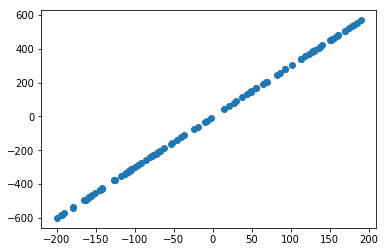

In [373]:
plt.scatter(x, y)

In [374]:
train_x = torch.Tensor(x).view(-1,1)

In [375]:
train_y = torch.Tensor(y).view(-1,1)

In [376]:
train_x[:5], train_y[:5]

(tensor([[ 185.],
         [-144.],
         [-160.],
         [-125.],
         [ 160.]]), tensor([[ 554.7245],
         [-432.3578],
         [-480.3177],
         [-373.7970],
         [ 481.1923]]))

In [386]:
class BasicNet2(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        nn.init.ones_(self.fc1.weight)
        nn.init.zeros_(self.fc1.bias)
        
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        nn.init.ones_(self.fc2.weight)
        nn.init.zeros_(self.fc2.bias)
        
    def forward(self, x):
        out = self.fc1(x)

        out = self.fc2(out)
        
        return out
    

In [387]:
model=BasicNet2(1, 1, 1)

In [388]:
model

BasicNet2(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
  (fc2): Linear(in_features=1, out_features=1, bias=True)
)

In [389]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [390]:
for e in range(1000):
    optimizer.zero_grad()
    
    outs = model.forward(train_x)
    loss = criterion(outs, train_y)
    loss.backward()
    
    optimizer.step()
    
    print(f"Epoch {e} has loss of {loss}")

Epoch 0 has loss of 57607.87109375
Epoch 1 has loss of 57261.8984375
Epoch 2 has loss of 56915.9375
Epoch 3 has loss of 56569.99609375
Epoch 4 has loss of 56224.08203125
Epoch 5 has loss of 55878.20703125
Epoch 6 has loss of 55532.3984375
Epoch 7 has loss of 55186.640625
Epoch 8 has loss of 54840.96875
Epoch 9 has loss of 54495.375
Epoch 10 has loss of 54149.87890625
Epoch 11 has loss of 53804.4921875
Epoch 12 has loss of 53459.22265625
Epoch 13 has loss of 53114.0859375
Epoch 14 has loss of 52769.09765625
Epoch 15 has loss of 52424.27734375
Epoch 16 has loss of 52079.625
Epoch 17 has loss of 51735.15234375
Epoch 18 has loss of 51390.88671875
Epoch 19 has loss of 51046.8359375
Epoch 20 has loss of 50703.01171875
Epoch 21 has loss of 50359.43359375
Epoch 22 has loss of 50016.11328125
Epoch 23 has loss of 49673.0625
Epoch 24 has loss of 49330.30078125
Epoch 25 has loss of 48987.83984375
Epoch 26 has loss of 48645.6953125
Epoch 27 has loss of 48303.8828125
Epoch 28 has loss of 47962.42187

Epoch 300 has loss of 601.3828735351562
Epoch 301 has loss of 584.9539794921875
Epoch 302 has loss of 568.9237060546875
Epoch 303 has loss of 553.2836303710938
Epoch 304 has loss of 538.02490234375
Epoch 305 has loss of 523.1409912109375
Epoch 306 has loss of 508.6241760253906
Epoch 307 has loss of 494.4659423828125
Epoch 308 has loss of 480.6596374511719
Epoch 309 has loss of 467.1981506347656
Epoch 310 has loss of 454.0745849609375
Epoch 311 has loss of 441.28106689453125
Epoch 312 has loss of 428.81121826171875
Epoch 313 has loss of 416.6568298339844
Epoch 314 has loss of 404.8125915527344
Epoch 315 has loss of 393.2713623046875
Epoch 316 has loss of 382.02679443359375
Epoch 317 has loss of 371.0727233886719
Epoch 318 has loss of 360.40252685546875
Epoch 319 has loss of 350.00897216796875
Epoch 320 has loss of 339.8868408203125
Epoch 321 has loss of 330.0297546386719
Epoch 322 has loss of 320.4322509765625
Epoch 323 has loss of 311.0877380371094
Epoch 324 has loss of 301.99124145507

Epoch 571 has loss of 2.200197458267212
Epoch 572 has loss of 2.195122003555298
Epoch 573 has loss of 2.1900577545166016
Epoch 574 has loss of 2.185044050216675
Epoch 575 has loss of 2.1801114082336426
Epoch 576 has loss of 2.175213098526001
Epoch 577 has loss of 2.1703383922576904
Epoch 578 has loss of 2.1655337810516357
Epoch 579 has loss of 2.1607277393341064
Epoch 580 has loss of 2.1559746265411377
Epoch 581 has loss of 2.151258707046509
Epoch 582 has loss of 2.146596670150757
Epoch 583 has loss of 2.1419625282287598
Epoch 584 has loss of 2.1373353004455566
Epoch 585 has loss of 2.1327710151672363
Epoch 586 has loss of 2.128269672393799
Epoch 587 has loss of 2.123735189437866
Epoch 588 has loss of 2.119276285171509
Epoch 589 has loss of 2.114814519882202
Epoch 590 has loss of 2.1103968620300293
Epoch 591 has loss of 2.1059963703155518
Epoch 592 has loss of 2.1016523838043213
Epoch 593 has loss of 2.0973005294799805
Epoch 594 has loss of 2.092968702316284
Epoch 595 has loss of 2.088

Epoch 805 has loss of 1.5086535215377808
Epoch 806 has loss of 1.5070122480392456
Epoch 807 has loss of 1.5053514242172241
Epoch 808 has loss of 1.503706932067871
Epoch 809 has loss of 1.5020976066589355
Epoch 810 has loss of 1.5004547834396362
Epoch 811 has loss of 1.4988371133804321
Epoch 812 has loss of 1.4972305297851562
Epoch 813 has loss of 1.4956364631652832
Epoch 814 has loss of 1.4940482378005981
Epoch 815 has loss of 1.492465853691101
Epoch 816 has loss of 1.4908881187438965
Epoch 817 has loss of 1.4893039464950562
Epoch 818 has loss of 1.48776376247406
Epoch 819 has loss of 1.4862008094787598
Epoch 820 has loss of 1.4846516847610474
Epoch 821 has loss of 1.4831055402755737
Epoch 822 has loss of 1.481583833694458
Epoch 823 has loss of 1.4800471067428589
Epoch 824 has loss of 1.4785430431365967
Epoch 825 has loss of 1.4770349264144897
Epoch 826 has loss of 1.4755382537841797
Epoch 827 has loss of 1.4740440845489502
Epoch 828 has loss of 1.4725552797317505
Epoch 829 has loss of

In [391]:
model.state_dict()

OrderedDict([('fc1.weight', tensor([[1.7317]])),
             ('fc1.bias', tensor([-0.1015])),
             ('fc2.weight', tensor([[1.7317]])),
             ('fc2.bias', tensor([-0.1783]))])

In [392]:
train_x[:5], train_y[:5]

(tensor([[ 185.],
         [-144.],
         [-160.],
         [-125.],
         [ 160.]]), tensor([[ 554.7245],
         [-432.3578],
         [-480.3177],
         [-373.7970],
         [ 481.1923]]))

In [395]:
preds = model.forward(train_x)

In [403]:
nppreds = preds.data.numpy()

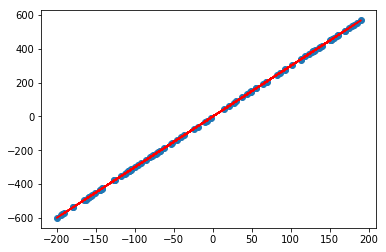

In [409]:
plt.scatter(x,y)
plt.plot(x, nppreds, color="r")